In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-salary-dataset/Employee_Salary_Dataset.ods
/kaggle/input/employee-salary-dataset/Employee_Salary_Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
employee_data = pd.read_csv("/kaggle/input/employee-salary-dataset/Employee_Salary_Dataset.csv")

print(employee_data)

    ID  Experience_Years  Age  Gender    Salary
0    1                 5   28  Female    250000
1    2                 1   21    Male     50000
2    3                 3   23  Female    170000
3    4                 2   22    Male     25000
4    5                 1   17    Male     10000
5    6                25   62    Male   5001000
6    7                19   54  Female    800000
7    8                 2   21  Female      9000
8    9                10   36  Female     61500
9   10                15   54  Female    650000
10  11                 4   26  Female    250000
11  12                 6   29    Male   1400000
12  13                14   39    Male   6000050
13  14                11   40    Male    220100
14  15                 2   23    Male      7500
15  16                 4   27  Female     87000
16  17                10   34  Female    930000
17  18                15   54  Female   7900000
18  19                 2   21    Male     15000
19  20                10   36    Male   

In [4]:
#This will attempt to convert the 'Salary' column to float directly
employee_data['Salary'] = employee_data['Salary'].astype(float)
print(employee_data)

    ID  Experience_Years  Age  Gender      Salary
0    1                 5   28  Female    250000.0
1    2                 1   21    Male     50000.0
2    3                 3   23  Female    170000.0
3    4                 2   22    Male     25000.0
4    5                 1   17    Male     10000.0
5    6                25   62    Male   5001000.0
6    7                19   54  Female    800000.0
7    8                 2   21  Female      9000.0
8    9                10   36  Female     61500.0
9   10                15   54  Female    650000.0
10  11                 4   26  Female    250000.0
11  12                 6   29    Male   1400000.0
12  13                14   39    Male   6000050.0
13  14                11   40    Male    220100.0
14  15                 2   23    Male      7500.0
15  16                 4   27  Female     87000.0
16  17                10   34  Female    930000.0
17  18                15   54  Female   7900000.0
18  19                 2   21    Male     15000.0


In [5]:
# Iterating over each column and try to convert its values to float
for column in employee_data.columns:
    try:
        employee_data[column] = employee_data[column].astype(float)
    except ValueError:
        print(f"Column '{column}' contains non-numeric values and cannot be converted to float.")

# Printing the updated DataFrame
print(employee_data)


Column 'Gender' contains non-numeric values and cannot be converted to float.
      ID  Experience_Years   Age  Gender      Salary
0    1.0               5.0  28.0  Female    250000.0
1    2.0               1.0  21.0    Male     50000.0
2    3.0               3.0  23.0  Female    170000.0
3    4.0               2.0  22.0    Male     25000.0
4    5.0               1.0  17.0    Male     10000.0
5    6.0              25.0  62.0    Male   5001000.0
6    7.0              19.0  54.0  Female    800000.0
7    8.0               2.0  21.0  Female      9000.0
8    9.0              10.0  36.0  Female     61500.0
9   10.0              15.0  54.0  Female    650000.0
10  11.0               4.0  26.0  Female    250000.0
11  12.0               6.0  29.0    Male   1400000.0
12  13.0              14.0  39.0    Male   6000050.0
13  14.0              11.0  40.0    Male    220100.0
14  15.0               2.0  23.0    Male      7500.0
15  16.0               4.0  27.0  Female     87000.0
16  17.0             

In [6]:
# Calculating the mean for each column individually
print(employee_data['ID'].mean())
print(employee_data['Experience_Years'].mean())
print(employee_data['Age'].mean())
# To Note: 'Gender' column is categorical, mean calculation doesn't make sense for it
print(employee_data['Salary'].mean())


18.0
9.2
35.48571428571429
2059147.142857143


In [7]:
# Calculating the mean excluding non-numeric columns
mean_values = employee_data.select_dtypes(include=np.number).mean()

# Printing mean values for each numeric column
print(mean_values)


ID                  1.800000e+01
Experience_Years    9.200000e+00
Age                 3.548571e+01
Salary              2.059147e+06
dtype: float64


In [8]:
# Calculating the difference between 'Salary' and 'Experience_Years' and store it in a new column 'Return'
employee_data['Return'] = employee_data['Salary'] - employee_data['Experience_Years']

# Printing the updated DataFrame
print(employee_data)

# Calculating the mean of the 'Return' column
print(employee_data['Return'].mean())

      ID  Experience_Years   Age  Gender      Salary     Return
0    1.0               5.0  28.0  Female    250000.0   249995.0
1    2.0               1.0  21.0    Male     50000.0    49999.0
2    3.0               3.0  23.0  Female    170000.0   169997.0
3    4.0               2.0  22.0    Male     25000.0    24998.0
4    5.0               1.0  17.0    Male     10000.0     9999.0
5    6.0              25.0  62.0    Male   5001000.0  5000975.0
6    7.0              19.0  54.0  Female    800000.0   799981.0
7    8.0               2.0  21.0  Female      9000.0     8998.0
8    9.0              10.0  36.0  Female     61500.0    61490.0
9   10.0              15.0  54.0  Female    650000.0   649985.0
10  11.0               4.0  26.0  Female    250000.0   249996.0
11  12.0               6.0  29.0    Male   1400000.0  1399994.0
12  13.0              14.0  39.0    Male   6000050.0  6000036.0
13  14.0              11.0  40.0    Male    220100.0   220089.0
14  15.0               2.0  23.0    Male

In [9]:

# Finding the minimum and maximum values of the 'Salary' column
min_salary = min(employee_data['Salary'])
max_salary = max(employee_data['Salary'])

# Printing the result
print("The salaries of the employees ranged from", min_salary, "to", max_salary)

The salaries of the employees ranged from 3000.0 to 10000000.0


In [10]:

# Using the describe() function on our DataFrame
description = employee_data.describe()

# Printing the description
print(description)


              ID  Experience_Years        Age        Salary        Return
count  35.000000          35.00000  35.000000  3.500000e+01  3.500000e+01
mean   18.000000           9.20000  35.485714  2.059147e+06  2.059138e+06
std    10.246951           7.55295  14.643552  3.170124e+06  3.170118e+06
min     1.000000           1.00000  17.000000  3.000000e+03  2.999000e+03
25%     9.500000           2.50000  22.500000  2.250000e+04  2.249650e+04
50%    18.000000           6.00000  29.000000  2.500000e+05  2.499950e+05
75%    26.500000          15.00000  53.500000  3.270000e+06  3.269980e+06
max    35.000000          27.00000  62.000000  1.000000e+07  9.999973e+06


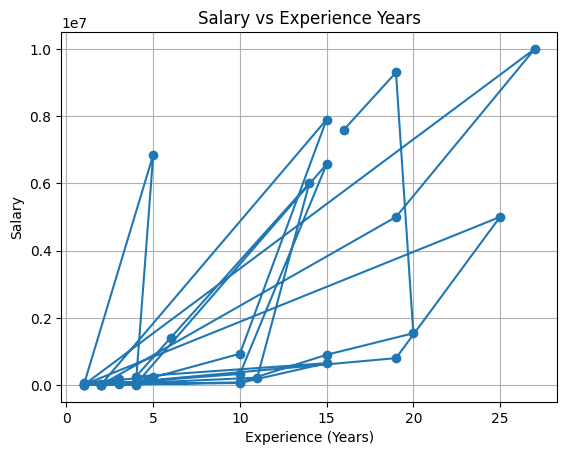

In [11]:

# Extracting data for plotting
x_data = employee_data['Experience_Years']
y_data = employee_data['Salary']

# Plotting the data
plt.plot(x_data, y_data, marker='o', linestyle='-')

# Customizing the plot 
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Salary vs Experience Years')

# Showing the plot
plt.grid(True)
plt.show()


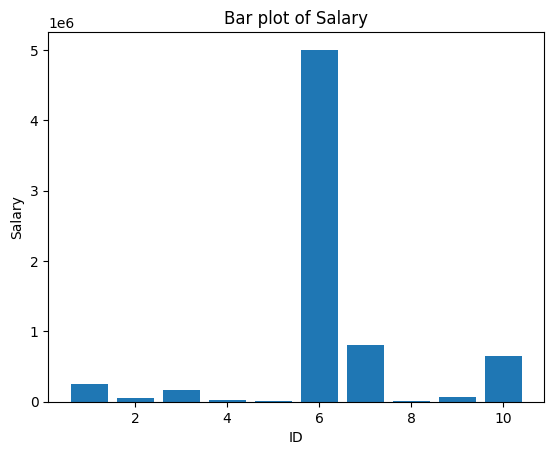

In [12]:
# Selecting a subset of the data (first 10 rows) for demonstration
employee_data1 = employee_data.head(10)

# Extracting data for plotting
x_data = employee_data1['ID']
y_data = employee_data1['Salary']  # Assuming 'Salary' is the column you want to plot

# Plotting the data
plt.bar(x_data, y_data)

# Customize the plot (add labels, title, etc. as needed)
plt.xlabel('ID')
plt.ylabel('Salary')
plt.title('Bar plot of Salary')

# Show the plot
plt.show()

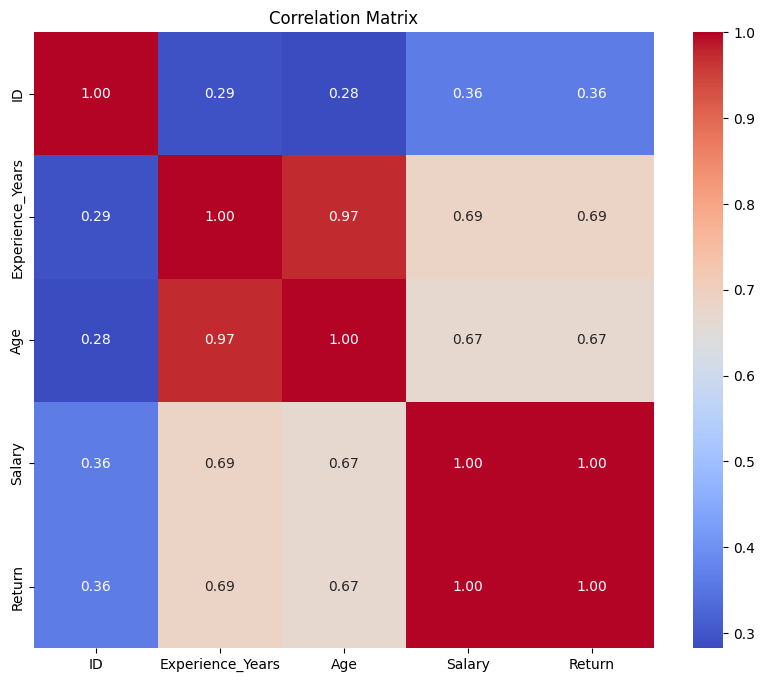

In [13]:
# Selecting only numeric columns
numeric_columns = employee_data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# Showing the plot
plt.show()

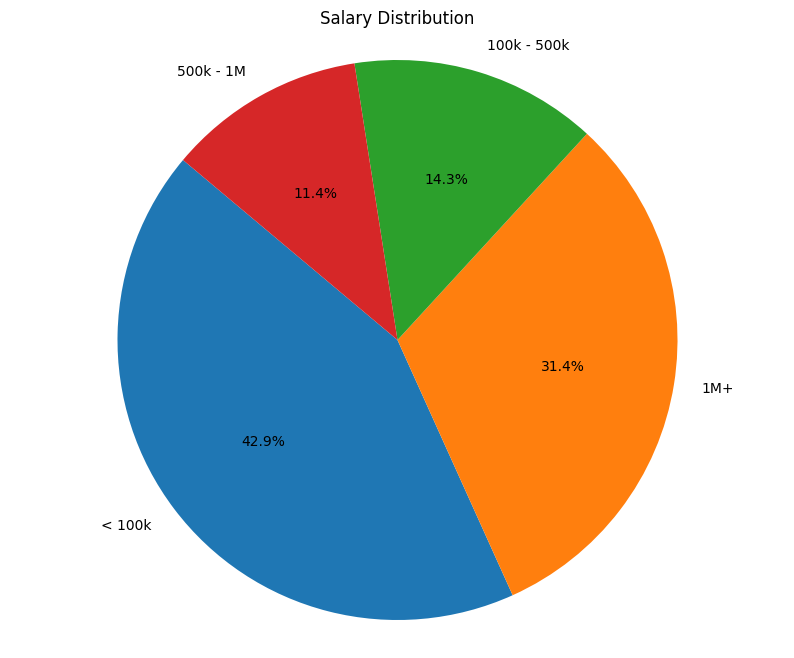

In [14]:
bins = [0, 100000, 500000, 1000000, np.inf]
bin_labels = ['< 100k', '100k - 500k', '500k - 1M', '1M+']

employee_data['salary_bins'] = pd.cut(employee_data['Salary'], bins=bins, labels=bin_labels)

salary_counts = employee_data['salary_bins'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Salary Distribution')
plt.axis('equal')

plt.show()

Outlier Points:
      ID  Experience_Years   Age  Gender      Salary     Return salary_bins
27  28.0              27.0  62.0  Female  10000000.0  9999973.0         1M+
33  34.0              19.0  53.0  Female   9300000.0  9299981.0         1M+


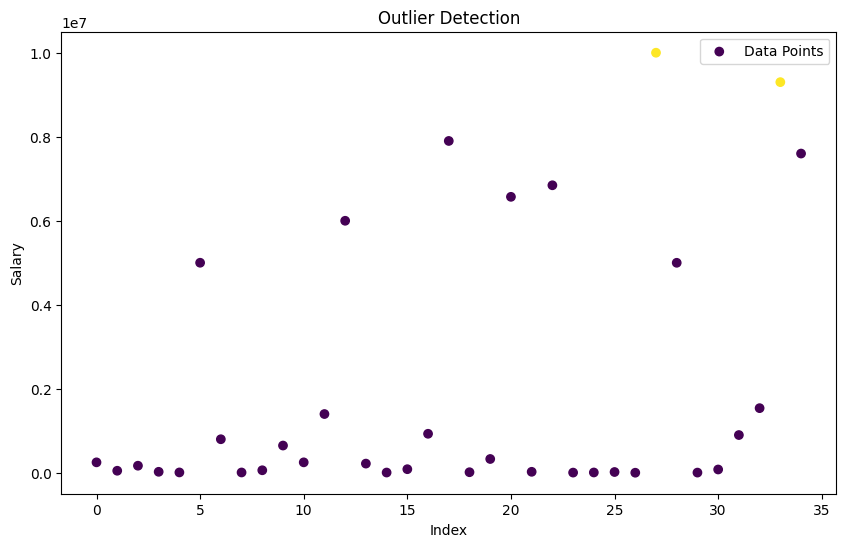

In [15]:
# Making a copy of our DataFrame employee_data to 'df'
df = employee_data.copy()

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detecting outliers in the 'Salary' column
outliers = detect_outliers_iqr(df['Salary'])
print("Outlier Points:")
print(df[outliers])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Salary'], c=outliers, cmap='viridis', label='Data Points')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Outlier Detection')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

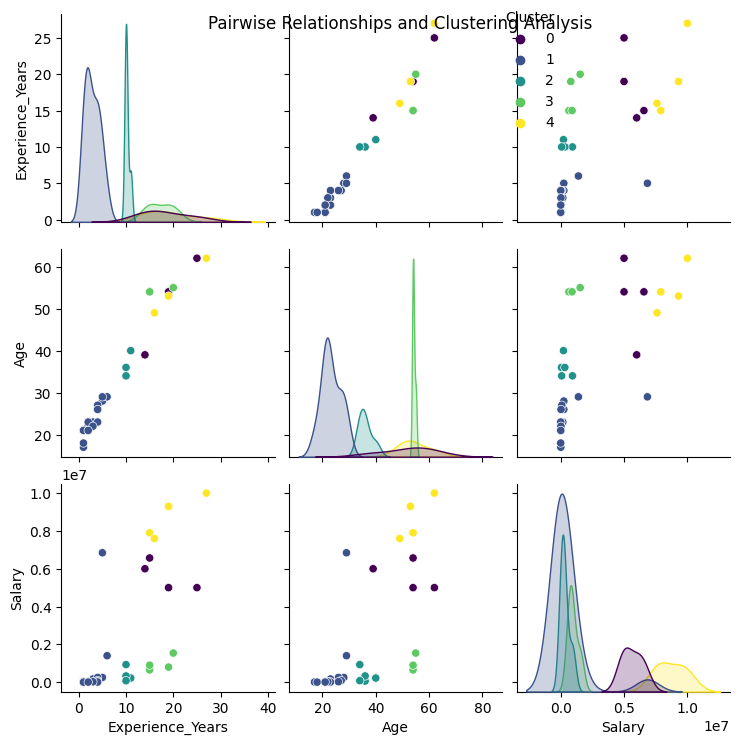

In [16]:
np.random.seed(42)
num_samples = 1000000
data = employee_data[['Experience_Years', 'Age', 'Salary']].copy()

# Explicitly handling infinite values before scaling
data = data.replace([np.inf, -np.inf], np.nan)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Performing K-means clustering
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
data['Cluster'] = labels

# Visualizing the clusters using a scatter matrix plot
g = sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')
g._legend.set_bbox_to_anchor((0.7, 0.9))
plt.suptitle('Pairwise Relationships and Clustering Analysis')
plt.show()


In [17]:
# Creating a sample dataset with millions of data points
num_samples = 1000000
data = employee_data[['Experience_Years', 'Salary']]

# Removing some random values to simulate the missing data
missing_percentage = 0.01  # 1% of values will be removed
mask = np.random.rand(*data.shape) < missing_percentage

# Setting missing values to NaN using .loc for assignment
data.loc[mask] = np.nan

# Finding missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Imputing missing values using mean imputation
data_imputed = data.fillna(data.mean())

# Verifying if missing values are imputed
missing_values_after_imputation = data_imputed.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)


Missing values in the dataset:
Experience_Years    0
Salary              0
dtype: int64

Missing values after imputation:
Experience_Years    0
Salary              0
dtype: int64
